Assignment 1

2.1. Problem Statement: Numpy

Problem Statement 1:
Write a function so that the columns of the output matrix are powers of the input vector.
The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.
HINT: Such a matrix with a geometric progression in each row is named for Alexandre-Theophile Vandermonde.

In [1]:
import numpy as np
def VecpoW(x,N):
    return np.vander(x,N)

VecpoW(np.array([1,2,4,5]),3)


array([[ 1,  1,  1],
       [ 4,  2,  1],
       [16,  4,  1],
       [25,  5,  1]])

Problem Statement 2:
    Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows:
The moving average sequence has n-k+1 elements as shown below.
The moving averages with k=4 of a ten-value sequence (n=10) is shown below
i 1 2 3 4 5 6 7 8 9 10
===== == == == == == == == == == ==
Input 10 20 30 40 50 60 70 80 90 100
y1 25 = (10+20+30+40)/4
y2 35 = (20+30+40+50)/4
y3 45 = (30+40+50+60)/4
y4 55 = (40+50+60+70)/4
y5 65 = (50+60+70+80)/4
y6 75 = (60+70+80+90)/4
y7 85 = (70+80+90+100)/4
Thus, the moving average sequence has n-k+1=10-4+1=7 values.
Question: Write a function to find moving average in an array over a window:
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [2]:
def MovAvg(l,k):
    mov_avg = []
    for i, x in enumerate(l, 1):
            if i == (len(l)-k+2):
                break
            else:
                mov_avg.append(np.ma.average(l[i-1:k+i-1]))
   
    return print('The k-th moving average of the given sequence: {}'.format(mov_avg))

In [3]:
MovAvg([10,20,30,40,50,60,70,80,90,100],4)

The k-th moving average of the given sequence: [25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0]


In [4]:
MovAvg([3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150],3)

The k-th moving average of the given sequence: [5.0, 4.666666666666667, 5.666666666666667, 6.666666666666667, 9.666666666666666, 28.666666666666668, 49.333333333333336, 72.66666666666667, 84.0, 93.33333333333333, 116.33333333333333]


2.2. Problem Statement: Pandas

Problem Statement 1:

1) How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [5]:
import pandas as pd

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [6]:
import numpy as np
izero = np.r_[-1, (df['X'] == 0).nonzero()[0]]  
idx = np.arange(len(df['X']))
idx - izero[np.searchsorted(izero - 1, idx) - 1]


x = (df['X'] != 0).cumsum()
y = x != x.shift()


df['Y'] = pd.to_numeric(y.groupby((y != y.shift()).cumsum()).cumsum(),downcast='signed')
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [7]:
dt = pd.date_range(start='01/01/2015',end='12/31/2015',freq='B')
s = pd.Series(np.random.rand(len(dt)),index=dt)
s.head()

2015-01-01    0.298174
2015-01-02    0.348554
2015-01-05    0.168177
2015-01-06    0.864387
2015-01-07    0.153005
Freq: B, dtype: float64

3) Find the sum of the values in s for every Wednesday

In [8]:
s[dt.dayofweek==2].sum()

27.541542064874648

4) Average For each calendar month

In [9]:
s.groupby(pd.Grouper(freq='M')).mean()

s.resample('M', how='mean')

D:\Data_Science_Boot_Camp\Python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


2015-01-31    0.501992
2015-02-28    0.468745
2015-03-31    0.530833
2015-04-30    0.430158
2015-05-31    0.576328
2015-06-30    0.468154
2015-07-31    0.537678
2015-08-31    0.666448
2015-09-30    0.403914
2015-10-31    0.400664
2015-11-30    0.506408
2015-12-31    0.514944
Freq: M, dtype: float64

5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [10]:
s.groupby(pd.TimeGrouper('4M')).idxmax()

D:\Data_Science_Boot_Camp\Python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


2015-01-31   2015-01-16
2015-05-31   2015-03-03
2015-09-30   2015-06-08
2016-01-31   2015-10-14
dtype: datetime64[ns]

Problem Statement 2:
Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam es_right.csv

Questions:
1) Delete unnamed columns

In [11]:
df = pd.read_csv(r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head(2)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48


2) Show the distribution of male and female

In [14]:
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

3) Show the top 5 most preferred names

In [15]:
df['Name'].value_counts().head()

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

4) What is the median name occurrence in the dataset

In [16]:
val = df['Id'].median()
df.loc[df['Id'] == val]['Name']

508197    Kasey
Name: Name, dtype: object

5) Distribution of male and female born count by states

In [17]:
df.groupby(['Gender','State']).count()

Id   Name   Year  Count
Gender State                            
F      AK      2404   2404   2404   2404
       AL      9878   9878   9878   9878
       AR      7171   7171   7171   7171
       AZ     14518  14518  14518  14518
       CA     45144  45144  45144  45144
       CO     11424  11424  11424  11424
       CT      6575   6575   6575   6575
       DC      3053   3053   3053   3053
       DE      2549   2549   2549   2549
       FL     25781  25781  25781  25781
       GA     19385  19385  19385  19385
       HI      3255   3255   3255   3255
       IA      7131   7131   7131   7131
       ID      4918   4918   4918   4918
       IL     21268  21268  21268  21268
       IN     13056  13056  13056  13056
       KS      7753   7753   7753   7753
       KY      8817   8817   8817   8817
       LA     10510  10510  10510  10510
       MA     10580  10580  10580  10580
       MD     11276  11276  11276  11276
       ME      2976   2976   2976   2976
       MI     16038  16038  16038  16038
       MN     10677  10677  10677  10677
       MO     11948  11948  11948  11948
       MS      7235   7235   7235   7235
       MT      2690   2690   2690   2690
       NC     17357  17357  17357  17357
       ND      2399   2399   2399   2399
       NE      5370   5370   5370   5370
...             ...    ...    ...    ...
M      ME      2777   2777   2777   2777
       MI     13243  13243  13243  13243
       MN      9004   9004   9004   9004
       MO      9917   9917   9917   9917
       MS      6862   6862   6862   6862
       MT      2986   2986   2986   2986
       NC     13530  13530  13530  13530
       ND      2581   2581   2581   2581
       NE      5029   5029   5029   5029
       NH      2659   2659   2659   2659
       NJ     12274  12274  12274  12274
       NM      4966   4966   4966   4966
       NV      6024   6024   6024   6024
       NY     22585  22585  22585  22585
       OH     14318  14318  14318  14318
       OK      8138   8138   8138   8138
       OR      7333   7333   7333   7333
       PA     14171  14171  14171  14171
       RI      2468   2468   2468   2468
       SC      8195   8195   8195   8195
       SD      2908   2908   2908   2908
       TN     10588  10588  10588  10588
       TX     27791  27791  27791  27791
       UT      8233   8233   8233   8233
       VA     11997  11997  11997  11997
       VT      1618   1618   1618   1618
       WA     11049  11049  11049  11049
       WI      8940   8940   8940   8940
       WV      3733   3733   3733   3733
       WY      1904   1904   1904   1904

[102 rows x 4 columns]

2.3. Problem Statement: Use Cases on Numpy and Pandas

1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as:

Output:
1) If the List element is a alphabet or string, the output will be
The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

2) If the List element is “0”,the output will be
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

3) If the List element is and integer except 0,then output will be:
The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer

In [18]:
import sys

randlst = ['x', 0, 2]

for entry in randlst:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is x
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


2) Array out of Bound Exception

Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except)

In [19]:
x = [1, 2, 3] 
try:  
    print("First Element of array x is {n}".format(n=x[0]))
  
    
    print("Element with Index 3 {n}".format(x[3]))

except IndexError: 
    print("Array Out of Bound error occurred for finding element of Index 3")

First Element of array x is 1
Array Out of Bound error occurred for finding element of Index 3


3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.

Note : The module created as fibo.py has to be placed in lib folder
For linux/ubuntu path = /home/anaconda/lib/python3 For Windows path = C:\Users\Ajit\Anaconda3\Lib

In [65]:
import Fibo
Fibo.fib2(15)

[1, 1, 2, 3, 5, 8, 13]

4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.

In [69]:
def reverse(s):
    return s[::-1] 
  
def isPalindrome(s):
    rev = reverse(s) 
  
    if (s == rev): 
        return True
    return False
   
s = "malayalam"
ans = isPalindrome(s) 
  
if ans == 1: 
    print("Yes") 
else: 
    print("No") 

Yes


5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [26]:
from cryptography.fernet import Fernet,MultiFernet
class Cipher:
    def __init__(self,string):
        self.string = string
        self.key = Fernet.generate_key()
        self.cipher_suite = Fernet(self.key)
        self.encoded_txt = self.cipher_suite.encrypt(self.string.encode('utf-8'))
        self.decoded_txt = self.cipher_suite.decrypt(self.encoded_txt)
        
    def excryptn(self):
        return print('Encrypted text of input String is: {}'.format(self.encoded_txt))
    def decryptn(self):
        return print('\nDecypted text of is: {}'.format(self.decoded_txt))

In [27]:
Cipher('Encoding Test String').excryptn()
Cipher('Encoding Test String').decryptn()

Encrypted text of input String is: b'gAAAAABc28s5Eq84RgqPnQyrrJbfIIa9rOHtsmx-XUtFLvqCDoVfu4XIe9osEBEJOcgkpJ9w-tObcI4kxuDPWN8IVA8Rt-KyN_ZKFb-HO13sT67MirZ2bxk='

Decypted text of is: b'Encoding Test String'


6) Get Data from the following link:
http://files.grouplens.org/datasets/movielens/ml-20m.zip
We will be using the following files for this exercise:
ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp
movies.csv : movieId, title, genres

I. Read the dataset using pandas.

In [23]:
import pandas as pd
df_rating = pd.read_csv('ratings.csv')
df_tag = pd.read_csv('tags.csv')
df_movie = pd.read_csv('movies.csv')

II. Extract the first row from tags and print its type.

In [29]:
print(type(df_tag.iloc[0]))

<class 'pandas.core.series.Series'>


In [30]:
df_tag.iloc[0]

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object

III. Extract row 0, 11, 2000 from tags DataFrame.

In [31]:
df_tag.iloc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


IV. Print index, columns of the DataFrame.

In [32]:
df_rating.head(2)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676


In [33]:
df_tag.head(2)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078


In [34]:
df_movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

In [35]:
df_rating['rating'].count()

20000263

In [36]:
df_rating['rating'].mean()

3.5255285642993797

In [37]:
df_rating['rating'].std()

1.051988919275684

In [38]:
df_rating['rating'].min()

0.5

In [39]:
df_rating['rating'].max()

5.0

In [40]:
df_rating['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

VI. Filter out ratings with rating > 5

In [41]:
df_rating[df_rating['rating']>4.5].head()

,userId,movieId,rating,timestamp
131,1,4993,5.0,1112484682
142,1,5952,5.0,1112484619
158,1,7153,5.0,1112484633
170,1,8507,5.0,1094786027
176,2,62,5.0,974820598


VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.

In [42]:
df_rating.isna().sum()
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [43]:
df_movie[df_movie['genres'].str.lower()=='animation'].head()

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation


IX. Find the average rating of movies.

In [44]:
pd.merge(df_movie,df_rating,how='inner',on='movieId')['rating'].mean() ## 3.5255285642993797

df_rating['rating'].mean()

3.5255285642993797

X. Perform an inner join of movies and tags based on movieId.

In [45]:
pd.merge(df_movie,df_tag,how='inner',on='movieId').head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [46]:
df_movie[(df_movie['genres'].str.lower()=='comedy') & (df_rating['rating'] > 4)]['title'].unique()[:5]

D:\Data_Science_Boot_Camp\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array(['Brothers McMullen, The (1995)', 'Party Girl (1995)',
       'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
       'Clerks (1994)', 'Exit to Eden (1994)'], dtype=object)

XII. Split 'genres' into multiple columns.

In [47]:
df_movie['genres'].head(2)

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
Name: genres, dtype: object

In [48]:
df_genres = df_movie['genres'].str.split('|',expand=True)

cols=[]
for i in range(df_genres.shape[1]):
    cols.append('genres_'+ str(i))

df_genres.columns=cols
df_genres.head(2)

,genres_0,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8,genres_9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None


XIII. Extract year from title e.g. (1995).

In [49]:
df1 = pd.Series(data = df_movie['title'].str.split(' '))
for i in df1:
    #s = i[-1].replace(')','')
    s= i[-1]
    #s = s.replace('(','')
    print(s)

(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1994)
(1995)
(1994)
(1995)
(1995)
(1995)
(1995)
(1994)
(1995)
(1995)
(1996)
(1995)
(1996)
(1996)
(1996)
(1996)
(1995)
(1995)
(1995)
(1996)
(1995)
(1995)
(1995)
(1996)
(1996)
(1995)
(1995)
(1995)
(1996)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1996)
(1996)
(1996)
(1995)
(1995)
(1996)
(1995)
(1996)
(1996)
(1995)
(1995)
(1994)
(1995)
(1996)
(1996)
(1996)
(1996)
(1996)
(1995)
(1994)
(1996)
(1996)
(1995)
(1995)
(1976)
(1995)
(1996)
(1995)
(1995)
(1995)
(1995)
(1996)
(1995)
(1996)
(1992)
(1992)
(1994)
(1995)
(1996)
(1994)
(1994)
(1994)
(1996)
(1995)
(1995)
(1995)
(1995)
(1995)
(1996)
(1995)
(1995)
(1995)
(1995)
(1996)
(1996)
(1988)
(1995)
(1995)

(1997)
(1998)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1981)
(1996)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1985)
(1997)
(1997)
(1997)
(1993)
(1998)
(1998)
(1997)
(1998)
(1997)
(1997)
(1996)
(1997)
(1997)
(1997)
(1997)
(1997)
(1995)
(1997)
(1997)
(1997)
(1997)
(1995)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1996)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1996)
(1997)
(1995)
(1997)
(1997)
(1997)
(1995)
(1997)
(1997)
(1996)
(1996)
(1997)
(1997)
(1998)
(1997)
(1997)
(1997)
(1997)
(1998)
(1997)
(1997)
(1998)
(1998)
(1998)
(1999)
(1998)
(1998)
(1998)
(1998)
(1997)
(1998)
(1996)
(1997)
(1998)
(1998)
(1998)
(1997)
(1998)
(1995)
(1997)
(1997)
(1998)
(1998)
(1998)
(1998)
(1997)
(1998)
(1998)
(1997)
(1998)
(1995)
(1998)
(1998)
(1998)
(1998)
(1997)
(1996)
(1998)
(1998)
(1997)
(1990)
(1998)
(1997)
(1995)
(1998)
(1998)
(1997)
(1997)
(1995)
(1998)
(1998)
(1998)
(1997)
(1998)
(1998)
(1998)
(1998)
(1998)
(1997)
(1998)
(1997)
(1998)
(1998)
(1997)
(1997)
(1998)

(1999)
(1998)
(1999)
(1999)
(1998)
(1998)
(1999)
(2000)
(1998)
(1998)
(1999)
(1973)
(1922)
(1953)
(1988)
(1973)
(1957)
(1973)
(1970)
(1971)
(1989)
(1978)
(1960)
(1984)
(1952)
(1993)
(1948)
(1982)
(1988)
(1971)
(1993)
(1985)
(1976)
(1971)
(1937)
(1991)
(1990)
(1961)
(1982)
(1984)
(1985)
(1964)
(2000)
(1999)
(1996)
(2000)
(1952)
(1974)
(1920)
(1925)
(1967)
(1975)
(1980)
(1971)
(1998)
(1999)
(2000)
(1999)
(1999)
(1999)
(1992)
(1977)
(1964)
(1992)
(1992)
(1993)
(1992)
(1993)
(1985)
(1992)
(1992)
(1993)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(1992)
(2000)
(1992)
(2000)
(2000)
(1999)
(1999)
(2000)
(1973)
(1998)
(1996)
(1971)
(1971)
(2000)
(2000)
(2000)
(1999)
(1999)
(1999)
(2000)
(1955)
(1997)
(1977)
(1993)
(1967)
(1930)
(2000)
(2000)
(2000)
(2000)
(1999)
(2000)
(1978)
(1944)
(1928)
(1931)
(1984)
(1918)
(1921)
(1955)
(1975)
(1982)
(1952)
(1951)
(2000)
(2000)
(1999)
(1999)
(1999)
(2000)
(2000)
(2000)
(2000)
(2000)

(1971)
(1984)
(1985)
(1984)
(1996)
(1998)
(1978)
(1981)
(1982)
(1997)
(2001)
(2001)
(2001)
(2000)
(1988)
(1962)
(1978)
(1980)
(1991)
(1966)
(1969)
(1976)
(1993)
(1970)
(1980)
(1980)
(1980)
(1980)
(1980)
(2001)
(2001)
(2001)
(2001)
(2001)
(2001)
(2001)
(2001)
(2000)
(2001)
(2001)
(2000)
(2000)
(2001)
(2001)
(2001)
(2001)
(2001)
(2001)
(2000)
(2000)
(2000)
(2000)
(2000)
(2001)
(2001)
(2001)
(2002)
(1999)
(1992)
(1994)
(1995)
(1980)
(1980)
(1986)
(1973)
(1996)
(2001)
(2001)
(2001)
(2001)
(2000)
(2001)
(2000)
(2000)
(2001)
(2001)
(2000)
(1955)
(1922)
(2000)
(2001)
(2001)
(2000)
(2001)
(2002)
(2001)
(2001)
(2001)
(2001)
(2001)
(2000)
(2001)
(2001)
(2000)
(1981)
(1969)
(1973)
(1991)
(1979)
(1974)
(1976)
(1971)
(1960)
(1981)
(1987)
(1964)
(1960)
(1959)
(1958)
(1963)
(1937)
(1941)
(1959)
(1971)
(1961)
(1957)
(1965)
(1983)
(1993)
(1983)
(1977)
(1979)
(1986)
(1951)
(2001)
(2001)
(2001)
(2000)
(2001)
(2001)
(2000)
(2001)
(2001)
(2001)
(2000)
(2001)
(1980)
(1980)
(1980)
(1964)
(1980)
(1980)
(1980)

(2002)
(2002)
(2001)
(2002)
(2003)
(2002)
(1992)
(1996)
(1985)
(1986)
(2001)
(1991)
(1993)
(1988)
(1986)
(2002)
(1959)
(1993)
(2001)
(2002)
(2003)
(2003)
(2002)
(2002)
(2001)
(2001)
(2002)
(2003)
(2003)
(2001)
(2001)
(2001)
(2001)
(1961)
(1975)
(1957)
(1942)
(1971)
(1973)
(1955)
(1966)
(1993)
(1977)
(1990)
(1957)
(1953)
(1990)
(1959)
(1991)
(1983)
(1998)
(1999)
(1988)
(1969)
(1991)
(1969)
(2002)
(2003)
(2003)
(2003)
(2003)
(2001)
(1937)
(1966)
(1976)
(1967)
(1945)
(1943)
(1953)
(1992)
(2002)
(2003)
(2003)
(2003)
(2003)
(2002)
(2002)
(2002)
(1990)
(1973)
(1997)
(1950)
(1989)
(1987)
(1948)
(1979)
(2001)
(2002)
(2003)
(2002)
(2001)
(2001)
(2003)
(2003)
(2002)
(2003)
(2002)
(2003)
(2003)
(2002)
(2002)
(2002)
(2003)
(2003)
(2003)
(2003)
(2003)
(2001)
(2000)
(1971)
(1957)
(1971)
(1994)
(1966)
(2002)
(1973)
(1986)
(1991)
(1988)
(2001)
(1984)
(1990)
(1993)
(1986)
(1978)
(1962)
(1991)
(1991)
(1991)
(1990)
(2003)
(2003)
(2003)
(2003)
(2002)
(2003)
(2002)
(2001)
(2002)
(2002)
(2003)
(2003)
(2002)

(1967)
(2002)
(1968)
(1977)
(2002)
(2003)
(1984)
(1986)
(1998)
(1990)
(1987)
(1996)
(1988)
(1979)
(1975)
(1974)
(1959)
(1962)
(1966)
(1946)
(1965)
(1992)
(1954)
(1958)
(1992)
(2002)
(1999)
(2002)
(2003)
(1970)
(1972)
(1971)
(2002)
(1993)
(1997)
(1966)
(1996)
(1996)
(1922)
(1969)
(1992)
(1992)
(1973)
(1993)
(1932)
(1987)
(1998)
(1966)
(1962)
(2002)
(1991)
(1962)
(1978)
(2002)
(1990)
(1999)
(1955)
(1998)
(1999)
(1990)
(1986)
(1991)
(2003)
(1984)
(1987)
(1992)
(1927)
(1963)
(2002)
(1987)
(1999)
(1999)
(2001)
(1992)
(2003)
(2003)
(1956)
(1959)
(1959)
(1974)
(1953)
(1962)
(1999)
(1955)
(1968)
(1983)
(1961)
(1956)
(1960)
(1998)
(1991)
(1935)
(1983)
(1987)
(1983)
(1951)
(1954)
(1960)
(1964)
(1969)
(1956)
(1960)
(1970)
(1959)
(1960)
(1953)
(1991)
(1953)
(1966)
(1933)
(1973)
(1946)
(1936)
(1994)
(1972)
(1983)
(1990)
(1939)
(1931)
(1940)
(1923)
(1956)
(1944)
(1971)
(1961)
(1993)
(1997)
(1966)
(1979)
(1993)
(1999)
(1933)
(1949)
(2000)
(1978)
(1997)
(1977)
(1936)
(1949)
(1975)
(1972)
(1984)
(1968)

(1994)
(1995)
(1995)
(1994)
(1994)
(1993)
(1994)
(1994)
(1994)
(1994)
(1994)
(1994)
(1994)
(1994)
(1994)
(1994)
(1994)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1995)
(1994)
(1995)
(1996)
(1996)
(1996)
(1996)
(1996)
(1997)
(1996)
(1996)
(1996)
(1996)
(1996)
(1995)
(1996)
(1996)
(1997)
(1997)
(1991)
(1996)
(1996)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1998)
(1998)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1997)
(1998)
(1997)
(1998)
(1997)
(1998)
(1999)
(1999)
(1998)
(1999)

(1998)
(2000)
(1998)
(1996)
(1998)
(1998)
(1999)
(1967)
(1998)
(1997)
(1998)
(1999)
(1997)
(1998)
(1999)
(1999)
(1998)
(1998)
(1998)
(1999)
(1998)
(1998)
(1999)
(1999)
(1998)
(1960)
(1994)
(1998)
(1998)
(1998)
(1998)
(1998)
(1999)
(1999)
(1973)
(1999)
(2000)
(1999)
(1998)
(1976)
(2001)
(1999)
(1998)
(1999)
(1999)
(1999)
(1998)
(1997)
(2002)
(2001)
(1998)
(1985)
(1999)
(2000)
(1999)
(1999)
(1983)
(2000)
(1999)
(1998)

(2000)
(2000)
(1999)
(1998)
(2000)
(1999)
(200

(2005)
(2005)
(2005)
(1922)
(2005)
(2000)
(2005)
(1937)
(1979)
(1932)
(2006)
(1931)
(1991)
(2006)
(2006)
(2005)
(2005)
(1992)
(1949)
(1945)
(2006)
(1979)
(1966)
(2005)
(1929)
(2006)
(1991)
(2006)
(2005)
(2005)
(2006)
(2006)
(2005)
(2006)
(2003)
(1983)
(2003)
(1987)
(2005)
(1970)
(2003)
(1962)
(1948)
(1947)
(1949)
(2006)
(1935)
(1970)
(2006)
(1956)
(2006)
(2005)
(1979)
(1970)
(1939)
(2006)
(1998)
(2005)
(1976)
(2006)
(1969)
(1978)
(2006)
(1934)
(1933)
(1954)
(1975)
(1999)
(2006)
(2005)
(1962)
(1968)
(2006)
(2005)
(2006)
(2005)
(2005)
(1966)
(2006)
(2006)
(2006)
(2006)
(2006)
(2006)
(1945)
(1959)
(1935)
(2006)
(2006)
(2006)
(2005)
(1939)
(1996)
(2003)
(2005)
(1952)
(2006)
(2000)
(2006)
(2006)
(1923)
(1921)
(1924)
(1933)
(2005)
(2005)
(1976)
(1972)
(1961)
(1956)
(2006)
(2005)
(2006)
(2006)
(1937)
(2006)
(2006)
(2005)
(2006)
(2006)
(1971)
(1947)
(1955)
(1959)
(1944)
(1974)
(1940)
(1985)
(2006)
(2006)
(2006)
(1941)
(2004)
(2006)
(2006)
(2005)
(1994)
(1993)
(1992)
(1986)
(2005)
(1947)
(1995)

(2007)
(2008)
(2007)
(2006)
(2008)
(2007)
(2008)
(2003)
(2007)
(1973)
(2008)
(2008)
(2007)
(2006)
(1972)
(2007)
(2008)
(2008)
(2008)
(2006)
(2005)
(2007)
(2007)
(2007)
(1940)
(1936)
(1932)
(1975)
(1936)
(1939)
(1941)
(1942)
(1952)
(2004)
(2006)
(2008)
(2008)
(2006)
(2006)
(2006)
(2008)
(2005)
(2008)
(2005)
(2008)
(1999)
(2008)
(2008)
(2007)
(2007)
(2001)
(2008)
(2008)
(2007)
(2006)
(2008)
(2007)
(2006)
(2007)
(2007)
(2008)
(2007)
(2007)
(2007)
(2006)
(1993)
(1953)
(1940)
(2006)
(2005)
(2008)
(2006)
(1949)
(2006)
(2007)
(2008)
(2007)
(2008)
(2007)
(2007)
(2007)
(2008)
(2007)
(2008)
(1958)
(2008)
(2003)
(2008)
(1959)
(2006)
(2005)
(1932)
(2006)
(2007)
(2007)
(2008)
(2007)
(2008)
(2008)
(2007)
(2008)
(2006)
(2006)
(2008)
(2008)
(2007)
(1987)
(1969)
(2008)
(2007)
(2006)
(1950)
(1969)
(1955)
(1972)
(1970)
(1959)
(1968)
(1929)
(1976)
(1968)
(1957)
(1935)
(1934)
(1933)
(1958)
(2008)
(1982)
(1975)
(1986)
(2008)
(1982)
(2008)
(2007)
(2006)
(2007)
(2002)
(1974)
(1977)
(1960)
(1920)
(1985)
(1921)

(2008)
(2008)
(2009)
(2009)
(2009)
(1972)
(2009)
(2009)
(2006)
(2001)
(2005)
(2009)
(2009)
(2009)
(2008)
(2009)
(1978)
(2009)
(2009)
(2007)
(1915)
(2005)
(1978)
(1943)
(2009)
(2001)
(2009)
(2009)
(1956)
(1970)
(1956)
(1964)
(1998)
(1998)
(1925)
(2008)
(2007)
(1925)
(1974)
(1945)
(1945)
(1999)
(1999)
(1936)
(1941)
(1925)
(1988)
(2000)
(1997)
(2009)
(2007)
(1973)
(1972)
(1936)
(1982)
(1949)
(1934)
(1934)
(1982)
(1939)
(2006)
(2008)
(2009)
(2008)
(2000)
(2000)
(2007)
(2009)
(2009)
(2007)
(1955)
(1988)
(1957)
(2009)
(2010)
(2009)
(2009)
(2007)
(2007)
(2009)
(1994)
(1990)
(2007)
(1979)
(2010)
(2010)
(2009)
(2005)
(1972)
(1990)
(1976)
(2009)
(1977)
(1967)
(2007)
(1983)
(1995)
(2009)
(2006)
(2009)
(2000)
(2006)
(2009)
(2009)
(2008)
(2009)
(2001)
(2003)
(1935)
(1963)
(2004)
(1952)
(1985)
(1994)
(2004)
(2004)
(2007)
(2000)
(2001)
(2004)
(1916)
(2009)
(2008)
(1936)
(1994)
(1958)
(2007)
(2009)
(2004)
(2008)
(2008)
(1957)
(1999)
(1988)
(2001)
(1987)
(2009)
(1998)
(2009)
(2008)
(1972)
(1977)
(2009)

(1969)
(1960)
(1944)
(2010)
(1964)
(1944)
(1928)
(1922)
(1922)
(2010)
(2007)
(2011)
(2010)
(1941)
(1936)
(1972)
(2006)
(1942)
(2002)
(1922)
(1940)
(1979)
(1948)
(2010)
(2008)
(2007)
(2009)
(2010)
(2010)
(2007)
(2008)
(1957)
(1971)
(2008)
(1952)
(2004)
(2006)
(1966)
(2003)
(2010)
(2008)
(1993)
(1937)
(1930)
(2010)

(1971)
(2010)
(1951)
(1951)
(2011)
(2009)
(2010)
(1936)
(2010)
(2002)
(1998)
(2008)
(1924)
(1940)
(1980)
(1981)
(2009)
(2010)
(2003)
(2009)
(2004)
(2007)
(1923)
(1923)
(2010)
(2009)
(2002)
(2010)
(2010)
(1947)
(1963)
(1944)
(1961)
(1944)
(2010)
(2009)
(2011)
(2010)
(1976)
(1968)
(2008)
(1953)
(1938)
(1943)
(1955)
(1967)
(1974)
(2011)
(2002)
(2002)
(1951)
(2009)
(1955)
(2011)
(2009)
(2011)
(2011)
(2010)
(2011)
(2000)
(1980)
(2010)
(2009)
(2006)
(2005)
(1999)
(2009)
(1954)
(1976)
(2000)
(2008)
(1960)
(1996)
(1978)
(2005)
(2003)
(1954)
(1976)
(1975)
(1993)
(2006)
(2003)
(2010)
(1954)
(2001)
(1931)
(1968)
(2010)
(2005)
(2010)
(1945)
(1978)
(1994)
(2009)
(1957)
(1937)
(2011)
(1963

(2006)
(2009)
(2011)
(2012)
(2012)
(2011)
(1972)
(1958)
(1967)
(1941)
(1932)
(2007)
(2011)
(1983)
(2011)
(2011)
(1949)
(2007)
(1974)
(2009)
(1962)
(1973)
(1990)
(2011)
(1940)
(2000)
(2010)
(1924)
(1971)
(2012)
(1994)
(2011)
(2010)
(1932)
(2012)
(1996)
(2006)
(1962)
(1916)
(2011)
(2010)
(2007)
(2008)
(1986)
(2008)
(2012)
(1947)
(1998)
(2001)
(2009)
(2011)
(1993)
(2011)
(2011)
(1975)
(2010)
(1963)
(2011)
(2011)
(2009)
(2011)
(2011)
(1976)
(2009)
(2011)
(2011)
(2010)

(2008)
(1939)
(1957)
(2009)
(2005)
(2010)
(1934)
(2000)
(1914)
(2008)
(1992)
(1984)
(2011)
(1973)
(1967)
(2000)
(2011)
(2010)
(1929)
(1966)
(2012)
(2011)
(1998)
(1974)
(2009)
(1995)
(2009)
(2005)
(2009)
(1997)
(1941)
(2009)
(2010)
(2012)
(2010)
(2011)
(2009)
(1949)
(1945)
(1990)
(2011)
(2011)
(2011)
(2009)
(1963)
(1961)
(2011)
(2011)
(2011)
(2010)
(1975)
(2010)
(2011)

(2011)
(1950)
(2011)
(1964)
(1965)
(2008)
(2000)
(2001)
(2002)
(2010)
(1985)
(1998)
(2001)
(2001)
(1990)
(2012)
(2010)
(1966)
(2011)
(2012)
(1925)
(2011)
(200

(2013)
(2008)
(2013)
(2005)
(2008)
(2011)
(2012)
(2012)
(2013)
(2010)
(2004)
(2002)
(1990)
(1997)
(1958)
(1913)

(1999)
(2006)
(2004)
(1962)
(1965)
(1966)
(2013)
(2011)
(2013)
(1998)
(1959)
(2010)
(2012)
(2010)
(1949)
(2013)
(2011)
(2006)
(2013)
(2013)
(1997)
(1969)
(2013)
(2013)

(1978)
(2008)
(2007)
(2013)
(2013)
(1971)
(1953)
(1956)
(2010)
(2010)
(2010)
(2011)
(2012)
(1973)
(2008)
(2011)
(1945)
(2000)
(2000)
(2011)
(1989)
(2012)
(1991)
(1964)
(2003)
(1947)
(2012)
(2010)
(2012)
(1965)
(1999)
(2012)
(2012)

(2009)
(2009)
(1950)
(1949)
(2009)
(1962)
(1963)
(2012)
(2012)
(1951)
(2012)
(2010)
(2010)
(2011)
(2008)
(2012)
(2013)
(2013)
(2013)
(1987)
(2011)
(2012)
(2013)
(2011)
(2012)


(2005)
(1975)
(2000)
(2012)
(2012)
(1954)
(1977)
(2012)
(2012)
(2010)
(1988)
(2013)
(2013)
(1957)
(1916)
(2013)
(2012)

(2001)
(1936)
(1930)
(1996)
(2007)
(2009)
(2011)
(2012)
(2012)
(1998)
(2011)
(2013)
(1970)
(1983)
(1998)
(2008)
(1959)
(2009)
(1929)
(2008)
(2011)
(2008)
(2012)
(2007)
(2012)
(1992)
(1999)


(2007)
(1994)
(1983)
(2014)
(1986)
(2011)
(2014)
(1983)
(2013)
(1934)
(2013)
(2012)
(1990)
(1981)
(2014)
(2014)
(2013)
(2004)
(2007)
(1989)
(1957)
(1996)
(1964)
(2012)
(2004)
(2012)
(1990)
(2010)
(2012)
(2006)
(1946)
(2000)
(2006)
(2013)
(2006)
(1999)
(2003)
(1962)
(1933)
(1932)
(2002)
(1999)
(2011)
(2008)


(1959)
(1966)
(2012)
(2012)
(1973)
(2013)
(2010)
(2004)
(2013)
(1958)
(1957)
(1994)
(2005)
(2013)
(2007)
(2003)
(2007)
(2011)
(1937)
(2014)

(2013)
(2013)
(2012)
(2011)
(2013)
(2013)
(2008)
(2008)
(2005)
(1979)
(2012)
(2004)
(1937)
(2012)
(2013)
(1965)
(2012)
(1954)
(1999)
(2008)
(2007-)
(2009)
(1936)
(1974)
(2013)
(2014)
(2013)
(2010)
(1989)
(1996)
(1975-1979)
(1992)
(1993)
(2006)
(2010)
(1983)
(2013)
(2013)
(2013)
(2011)
(2000)
(1975)
(2012)
(2009)
(2011)
(1931)
(1981)
(1981)
(2014)
(1999)
(2010)
(1958)
(2001)
(2008)
(1994)
(1998)
(2014)
(2004)
(2013)
(2013)
(2009)


(1995)
(1997)
(2013)
(2013)
(2009)

(2009)
(1941)
(2006)
(2013)
(2013)
(2013)
(2012)
(2011)
(2009)
(2014)
(1929)
(

(2002)
(1979)
(2014)
(1950)
(1987)
(1943)
(1948)
(2008)
(2007)
(1946)
(1981)
(2014)
(2009)
(2009)
(2012)
(1937)
(1968)
(2012)
(2013)
(2014)
(2014)
(1968)
(2014)
(1961)
(2013)
(1999)
(1943)
(1932)
(1967)
(2004)
(2006)
(1924)
(2013)
(1968)
(1993)
(2013)
(1936)
(2010)
(2013)
(1950)
(1926)
(1931)
(2014)
(2012)
(2013)
(2012)
(2011)
(2013)
(2013)
(2013)
(2014)
(2012)
(2009)
(2014)
(2014)
(2010)
(1937)
(1929)
(1967)
(1984)
(1936)
(2013)
(2014)
(1929)
(1955)
(1957)
(1925)
(1968)
(1940)
(1943)
(2007)
(1946)
(2008)
(1965)
(1993)
(2014)
(1936)
(2013)
(2014)

(1999)
(1963)
(1984)
(1941)
(2011)
(1989)
(1973)
(1950)
(1965)
(1938)
(2009)
(2014)
(2011)
(2012)
(2011)
(2013)
(1934)
(2011)
(2004)
(2007)
(2011)
(1946)
(1965)
(2008)
(1985)
(2013)
(1987)
(2014)
(2014)
(1978)
(1974)
(1967)
(2014)
(2014)
(2014)
(2006)
(2014)
(1966)
(2014)
(2011)
(2011)
(2014)
(2009)
(1981)
(1984)
(1981)
(2014)
(2014)
(2014)
(2014)
(2014)
(2002)
(2014)
(2014)
(2012)
(2013)
(2013)
(1930)
(1932)
(1932)
(1932)
(2014)
(2014)
(2005

(2007)
(2013)
(1958)
(2014)
(2013)
(2010)
(2006)
(2015)
(2014)
(1994)
(2011)
(1996)
(1987)
(1977)
(2004)
(2009)
(2010)
(2000)
(2015)
(2014)
(1951)
(1974)
(1975)
(2015)
(1949)
(1956)
(1960)
(2011)
(1968)
(1968)
(1970)
(1972)
(1977)
(2014)
(2014)
(1968)
(2014)
(1954)
(1957)
(1970)
(1977)
(2013)
(2007)
(2003)
(2002)
(1983)
(2009)
(1977)
(2012)
(2008)
(2011)
(2012)
(2013)
(2010)
(2013)
(2008)
(2014)
(2012)
(1961)
(1970)
(2009)
(2009)
(2010)
(2014)
(2014)
(1988)
(2013)
(2008)
(2000)
(2003)
(2008)
(2014)
(2000)
(1976)
(2005)
(1962)
(1988)
(1985)
(1941)
(1976)
(2011)
(2011)
(1939)
(1946)
(1951)
(1961)
(2011)
(2009)
(2013)
(1993)
(2013)
(2009)
(2014)
(2009)
(2003)
(1998)
(1985)
(2009)
(2014)
(2012)
(1974)
(1975)
(1975)
(1976)
(1976)
(1976)
(1977)
(1977)
(1978)
(1978)
(1978)
(1979)
(2014)
(1973)
(1972)
(2014)
(2014)
(2014)
(1975)
(2014)
(2011)
(2015)
(2014)
(2014)
(2012)
(2006)
(2013)
(2014)
(2005)
(2014)
(2015)
(1980)
(2009)
(2001)
(2011)
(2015)
(2014)
(2006)
(1985)
(1988)
(2015)
(2013)
(1984)

XIV. Select rows based on timestamps later than 2015-02-01.

In [50]:
df_tag[pd.to_datetime(df_tag['timestamp'],unit='s') > '2015-02-01 00:00:00']

,userId,movieId,tag,timestamp
301,318,260,1970s,1424472169
302,318,260,fantasy,1424472169
303,318,260,sci-fi,1424472169
304,318,115149,Action,1424534310
305,318,115149,Revenge,1424534283
306,318,115149,Willem Dafoe,1424534383
324,342,318,masterplan,1423424898
326,342,318,prison escape,1423424898
327,342,318,redemption,1423424898
589,342,108190,based on a book,1426978115


XV. Sort the tags DataFrame based on timestamp.

In [51]:
df_tag.sort_values('timestamp')

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399
333922,100371,47,morgan freeman,1135429412
333921,100371,47,brad pitt,1135429412
333936,100371,4011,brad pitt,1135429431
333937,100371,4011,guy ritchie,1135429431
333920,100371,32,bruce willis,1135429442


2.4. Problem Statement: Matplotlib

Matplotlib:
    
This assignment is for visualization using matplotlib:
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    
titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion

In [52]:
import pandas as pd

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
total_rec = len(df)
df_sex = df.groupby(['sex'])['sex'].count()
Female = df_sex['female']
Male = df_sex['male']

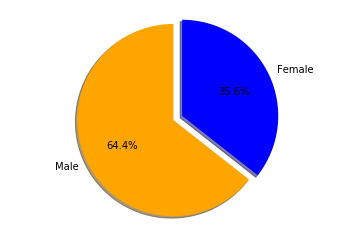

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['Male', 'Female']
sizes =[Male,Female]
colors = ['orange', 'blue']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, colors=colors, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

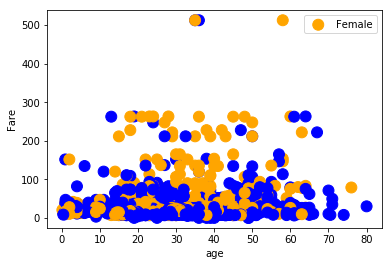

In [61]:
import numpy as np

x = df['age']
y = df['fare']
group = ('male', 'blue')
df['color'] = np.where(df['sex']=='female','orange','blue')
plt.scatter(x, y,c = df['color'], s = 120, label = ['Male','Female'])
plt.xlabel('age')
plt.ylabel('Fare')
plt.legend(['Female','Male'])

2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})
    

In [70]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [71]:
import pandas as pd

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [72]:
df['FlightNumber'] = [10045+(i*10) for i in range(5) ]
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [73]:
temp_df = pd.DataFrame()
temp_df[['From', 'To']] = df['From_To'].str.split('_', expand=True)
temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [74]:
temp_df['From'] = temp_df['From'].str.capitalize()
temp_df['To'] = temp_df['To'].str.capitalize()
temp_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [75]:
df.drop('From_To',axis=1,inplace=True)
df=pd.concat([df,temp_df],axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [76]:
Header=[]

maxdelaylist = max(df['RecentDelays'].values.tolist(),key=len)

for idx,val in enumerate(maxdelaylist):
    Header.append('delay_' + str(idx))

delay_df = df['RecentDelays'].apply(lambda x: ', '.join(map(str, x))).str.split(',',expand=True)
delay_df.columns = Header

df.drop(columns = 'RecentDelays', inplace=True)

df = pd.concat([df,delay_df],axis=1)
df

,FlightNumber,Airline,From,To,delay_0,delay_1,delay_2
0,10045,KLM(!),London,Paris,23,47,None
1,10055,<Air France> (12),Madrid,Milan,,None,None
2,10065,(British Airways. ),London,Stockholm,24,43,87
3,10075,12. Air France,Budapest,Paris,13,None,None
4,10085,"""Swiss Air""",Brussels,London,67,32,None


2.6. Problem Statement: Pandas SQL

Read the following data set:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

Rename the columns as per the description from this file:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Task:
Create a sql db from adult dataset and name it sqladb

In [79]:
import pandas as pd
import sqlite3 as sql
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [81]:
df.columns =['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','label' ]
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Task:
    
Create a sql db from adult dataset and name it sqladb

In [82]:
import sqlite3
import pandas as pd
from pandas import DataFrame, Series

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
sqladb = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [83]:
sqladb.columns =['age','workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','label' ]
sqladb.head(2)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


1. Select 10 records from the adult sqladb

In [84]:
pysqldf = lambda q: sqldf(q, globals())
query = 'SELECT * FROM sqladb LIMIT 10;'
pysqldf(query)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


2. Show me the average hours per week of all men who are working in private sector

In [85]:
pysqldf("""select avg(hoursperweek) 'Average Hours Per Week' from sqladb where trim(workclass)='Private' ;""")

,Average Hours Per Week
0,40.267096


3. Show me the frequency table for education, occupation and relationship, separately

In [86]:
q = 'select education, count(1) as Frequency from sqladb group by education'
pysqldf(q)

,education,Frequency
0,10th,933
1,11th,1175
2,12th,433
3,1st-4th,168
4,5th-6th,333
5,7th-8th,646
6,9th,514
7,Assoc-acdm,1067
8,Assoc-voc,1382
9,Bachelors,5354


In [87]:
q = 'select occupation, count(1) as Frequency from sqladb group by occupation'
pysqldf(q)

,occupation,Frequency
0,?,1843
1,Adm-clerical,3769
2,Armed-Forces,9
3,Craft-repair,4099
4,Exec-managerial,4066
5,Farming-fishing,994
6,Handlers-cleaners,1370
7,Machine-op-inspct,2002
8,Other-service,3295
9,Priv-house-serv,149


In [88]:
q = 'select relationship, count(1) as Frequency from sqladb group by relationship'
pysqldf(q)

,relationship,Frequency
0,Husband,13193
1,Not-in-family,8304
2,Other-relative,981
3,Own-child,5068
4,Unmarried,3446
5,Wife,1568


4. Are there any people who are married, working in private sector and having a master’s degree

In [89]:
query='''select * from sqladb where trim(maritalstatus) ='Married-civ-spouse' and trim(workclass)='Private' and trim(education)='Masters' '''
pysqldf(query)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,label
0,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
2,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
3,31,Private,99928,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,<=50K
4,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K
5,34,Private,142897,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,7298,0,35,Taiwan,>50K
6,62,Private,270092,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
7,41,Private,445382,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,65,United-States,>50K
8,33,Private,208405,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
9,49,Private,192776,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,45,United-States,>50K


5. What is the average, minimum and maximum age group for people working in different sectors

In [90]:
query='select workclass,avg(age),min(age),max(age) from sqladb group by workclass'
pysqldf(query)

,workclass,avg(age),min(age),max(age)
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436392,17,81
8,Without-pay,47.785714,19,72


6. Calculate age distribution by country

In [91]:
query='''select nativecountry as 'Native Country',avg(age),min(age),max(age) from sqladb group by nativecountry'''
pysqldf(query)

,Native Country,avg(age),min(age),max(age)
0,?,38.725557,17,90
1,Cambodia,37.789474,18,65
2,Canada,42.545455,17,80
3,China,42.533333,22,75
4,Columbia,39.711864,18,75
5,Cuba,45.768421,21,82
6,Dominican-Republic,37.728571,18,78
7,Ecuador,36.642857,21,90
8,El-Salvador,34.132075,17,79
9,England,41.155556,17,90


7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital-loss'

In [92]:
query='''select capitalgain - capitalloss as 'Net-Capital-Gain' ,capitalgain,capitalloss from sqladb'''
pysqldf(query)

,Net-Capital-Gain,capitalgain,capitalloss
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,14084,14084,0
8,5178,5178,0
9,0,0,0


Problem statement 2:

Read the following data set:

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Task:
1. Create an sqlalchemy engine using a sample from the data set

In [93]:
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)
df.columns=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
engine = create_engine('sqlite:///myData.db')

In [94]:
df.to_sql('my_alchem', engine)

2. Write two basic update queries

In [95]:
print(engine.execute('''UPDATE my_alchem
SET income = '<30K'
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

print(engine.execute('''SELECT * FROM my_alchem
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

print(engine.execute('''UPDATE my_alchem
SET income = '<30K'
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

print(engine.execute('''SELECT * FROM my_alchem
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', '<30K')]
[(2, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', '<30K')]


3. Write two delete queries

In [96]:
print(engine.execute('''DELETE FROM my_alchem
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

print(engine.execute('''SELECT * FROM my_alchem
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

print(engine.execute('''DELETE FROM my_alchem
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

print(engine.execute('''SELECT * FROM my_alchem
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[]
[]


4. Write two filter queries

In [97]:
print(engine.execute('''SELECT * FROM my_alchem WHERE race LIKE ' W%' ''').fetchall())

print(engine.execute('''SELECT * FROM my_alchem WHERE age  IN(30, 40) ''').fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5. Write two function queries

In [98]:
print(engine.execute('''SELECT * FROM my_alchem
WHERE LENGTH(workclass)==8 ''').fetchall())

print(engine.execute('''SELECT sex,upper(sex) FROM my_alchem
WHERE LENGTH(workclass)==9 ''').fetchall())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

